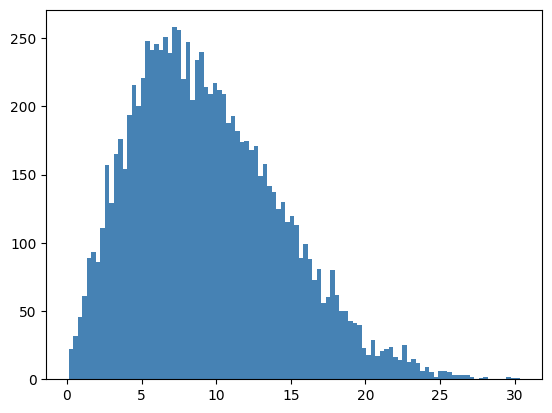

In [1]:
#Importar libreria necesarias
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
#1. Generar de la distribucion Rayleigh
np.random.seed(1735)
muestra = np.random.rayleigh(scale=7.53, size=10000)

#Histograma de la muestra
plt.hist(muestra, bins=100, color='steelblue')
plt.show()


In [2]:
#2. Crear conjunto de entrenamiento
from sklearn.model_selection import train_test_split
aux = np.random.choice(muestra, size=160, replace=True)

#3. Dividir en conjunto de entrenamiento y de prueba (80, 20) con un total de 160 puntos
train, test = train_test_split(aux, test_size=0.2)

#Dividir el conjunto de entrenamiento en entrenamiento y validacion
ytrain, ytest = train_test_split(train, test_size=0.2)


 n = 2


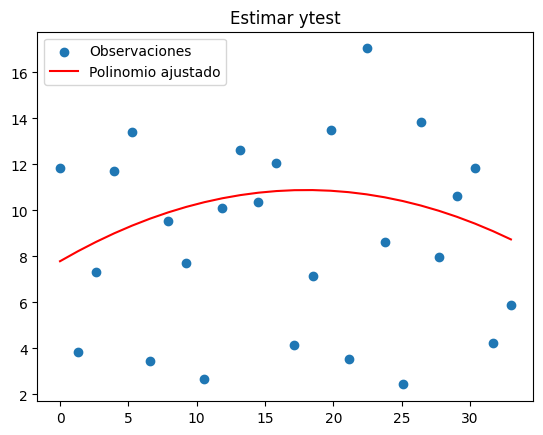


 n = 3


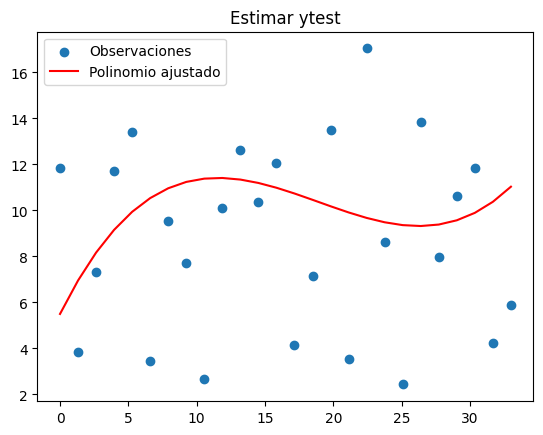


 n = 4


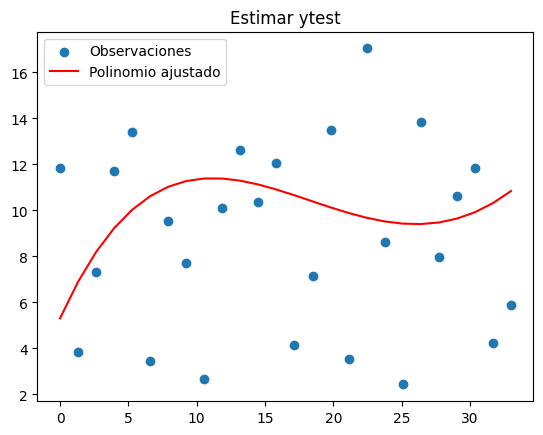


 n = 5


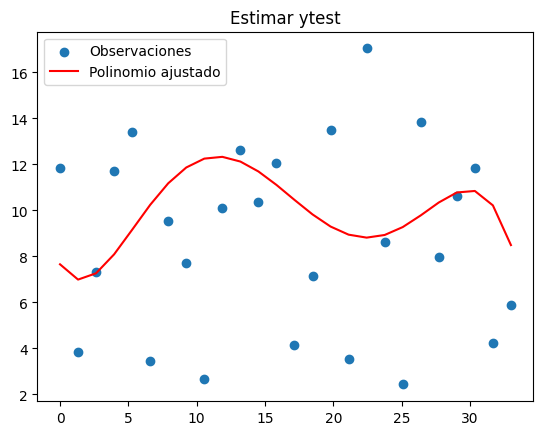


 n = 6


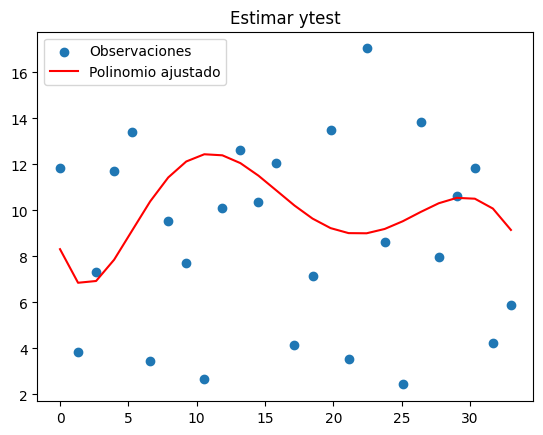


 n = 7


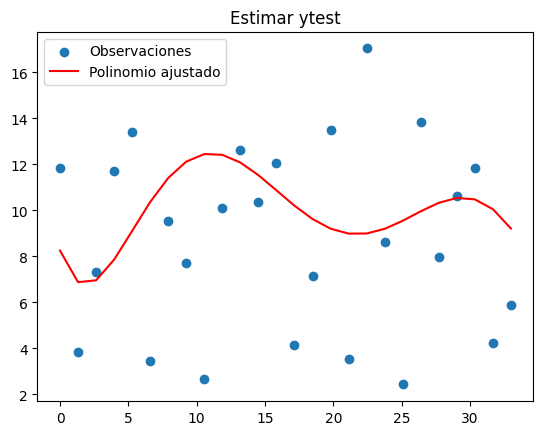


 n = 8


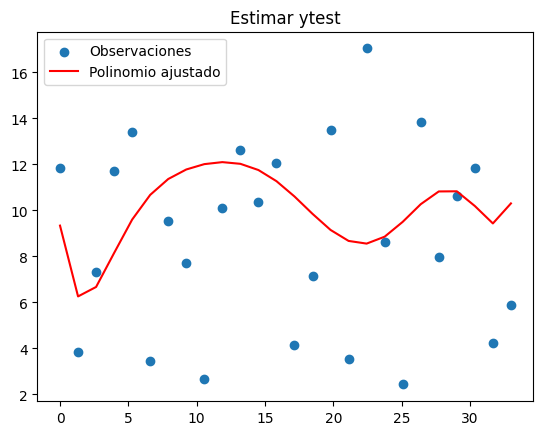


 n = 9


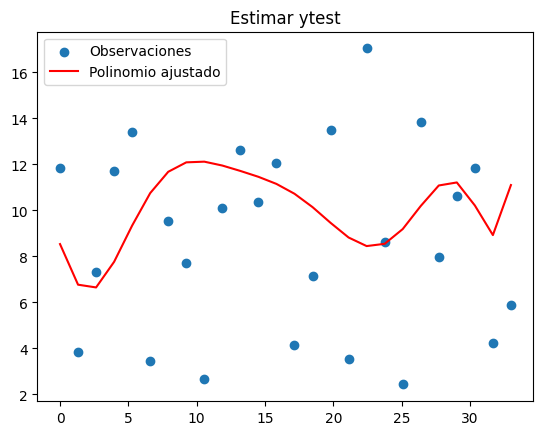


 n = 10


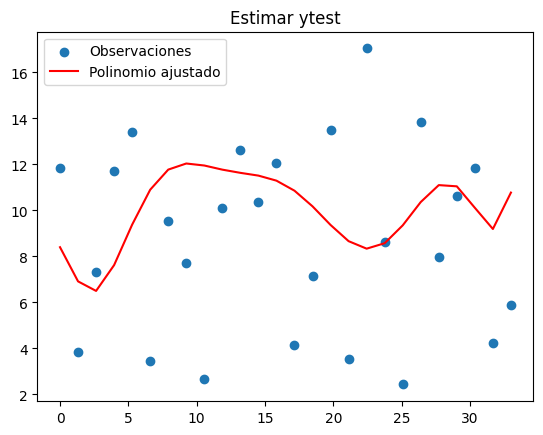


 n = 11


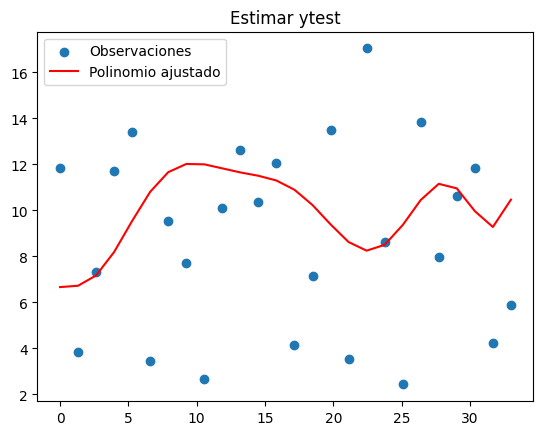


 n = 12


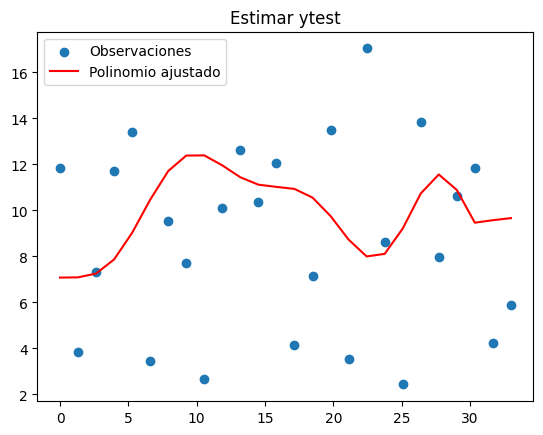


 n = 13


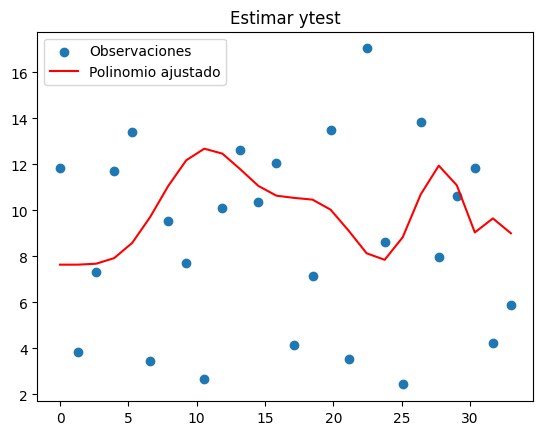


 n = 14


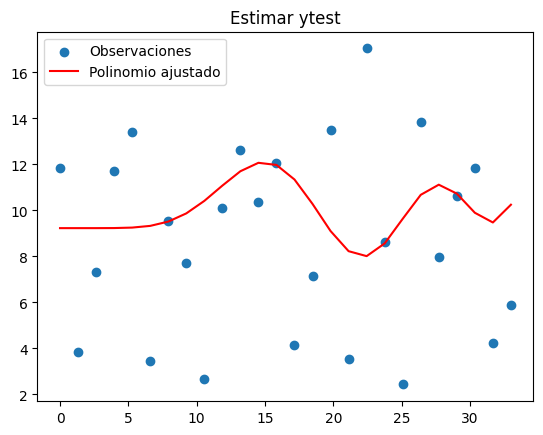


 n = 15


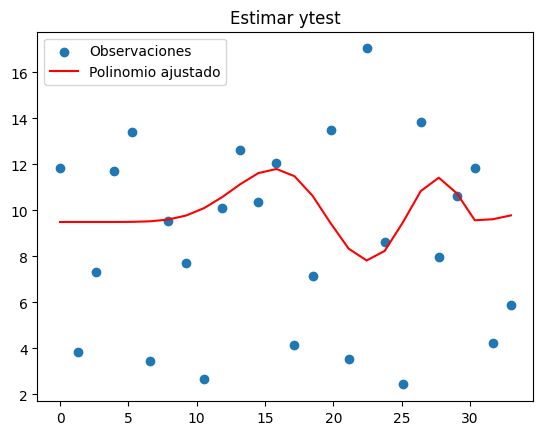


 n = 16


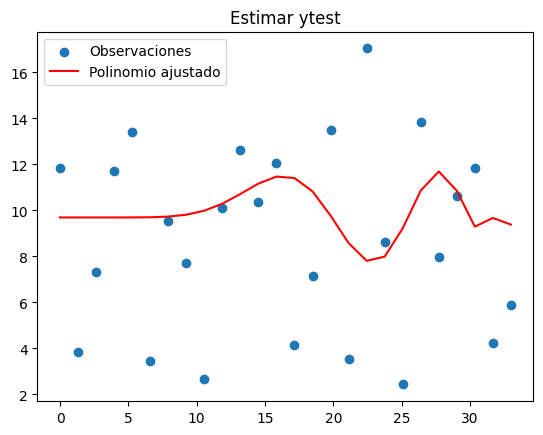

,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
Sesgo,23.461244,22.617191,22.612301,21.939555,21.889233,21.888762,21.747534,21.666048,21.642122,21.687756,21.589394,21.675133,22.961151,23.109168,23.205820
Varianza,17.445680,19.871425,19.838628,19.220219,19.420514,19.452319,18.982870,19.881879,20.065457,20.328712,20.875332,20.394675,18.230399,18.228044,18.193579
MAE,3.486060,3.716798,3.711438,3.564682,3.622094,3.626565,3.561846,3.701800,3.718593,3.718561,3.797182,3.785153,3.451972,3.459485,3.473787
MSE,17.445680,19.871425,19.838628,19.220219,19.420514,19.452319,18.982870,19.881879,20.065457,20.328712,20.875332,20.394675,18.230399,18.228044,18.193579
R2_score,-0.094812,-0.247041,-0.244983,-0.206174,-0.218744,-0.220740,-0.191279,-0.247697,-0.259218,-0.275738,-0.310042,-0.279878,-0.144058,-0.143910,-0.141747


In [10]:
#4. Regresión polinomial del conjunto de entrenamiento con grados de entre 2 y 16
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

x= np.linspace(0,33, num=102)
grados_polinomio = []
datos =[]
for k in range(2,17):
  print('\n n =', k)

  grados_polinomio.append(k)

  transformador = PolynomialFeatures(degree=k)
  aux_poli = transformador.fit_transform(x.reshape(-1,1))
  modelo = LinearRegression()
  modelo.fit(aux_poli, ytrain)

  #Usamos datos de auxtest para hacer estimaciones
  aux2_poli = transformador.fit_transform(x.reshape(-1,1))
  y_hat = modelo.predict(aux2_poli)
  aux3 = np.linspace(0,33, num=26)
  aux4 = transformador.fit_transform(aux3.reshape(-1,1))
  y_pred = modelo.predict(aux4)
  plt.scatter(aux3, ytest, label='Observaciones')
  plt.plot(aux3, y_pred, label='Polinomio ajustado', color='red')
  plt.title('Estimar ytest')
  plt.legend()
  plt.show()
  #Calcular sesgo, varianza, MAE, MSE, R2_score para cada valor de k
  bias = mean_squared_error(ytrain, y_hat)
  variance = mean_squared_error(ytest, y_pred)
  auxdatos = [bias, variance, mean_absolute_error(ytest, y_pred), mean_squared_error(ytest, y_pred), r2_score(ytest, y_pred)]
  datos.append(auxdatos)

metricas = ['Sesgo', 'Varianza','MAE','MSE', 'R2_score']
datos = np.array(datos).T
df = pd.DataFrame(data= datos, index=metricas, columns=grados_polinomio)
df

In [11]:
#Se elige el polinomio de grado 14 debido a que, despues varias simulaciones se observa que reduce el MSE y el MAE con respecto a polinomio de menor grado
# y los polinomios de mayor grado no ofrecen una mejora significativa

#7. Calcular la distribucion Rayleigh utilizando el estimador máximo verosímil

#calculo del estimador
sigma = 0
for j in range(len(train)):
    sigma = sigma + (train[j])**2
sigma = np.sqrt(sigma/(2*len(train)))
print("MLE: ",sigma)

simulacion = np.random.rayleigh(scale=sigma, size=128)
#Calculo de sesgo, varianza, MAE, MSE, R2_score
#[bias, variance, mean_absolute_error(ytest, y_pred), mean_squared_error(ytest, y_pred), r2_score(ytest, y_pred)]
#metricas = ['Sesgo', 'Varianza','MAE','MSE', 'R2_score']

print('Sesgo: ', mean_squared_error(train, simulacion))
print('Varianza: ', np.var(train-simulacion))
print('MAE: ', mean_absolute_error(train, simulacion))
print('MSE: ', mean_squared_error(train, simulacion))
print('R2_score: ', r2_score(train, simulacion))

MLE:  7.6636912609560515
Sesgo:  44.18537128770713
Varianza:  44.01892920611282
MAE:  5.0963146093867095
MSE:  44.18537128770713
R2_score:  -0.943331599542609
